In [1]:
from strat.create_dataset import dataset, prepare_imputation
from strat.run_rcv import RCV, relabel
import strat.utils as ut
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s',
                    level=logging.INFO, datefmt='%I:%M:%S')

In [2]:
vineland, demo_info = dataset(ut.instrument_dict, ut.phenotype_file, phenotype='autism', ptype=2, save=True)

07:58:42 INFO: Select individuals with autism and save demographic info.
07:59:09 INFO: Number of subjects with autism: 17772


07:59:09 INFO: Loading datasets:
07:59:09 INFO: vinelandsurvey_200505
07:59:10 INFO: Read table vinelandsurvey_200505 -- N subjects (unique): 2872 (1513)

07:59:10 INFO: vinelandparent_200503
07:59:11 INFO: Read table vinelandparent_200503 -- N subjects (unique): 1904 (1290)

07:59:11 INFO: vinland301
07:59:11 INFO: Read table vinland301 -- N subjects (unique): 1818 (445)

07:59:11 INFO: Processing VINELAND
07:59:13 INFO: Dropped 102 observations with completely missing information
07:59:13 INFO: Dropped 1715 duplicated observations
07:59:13 INFO: Current number of observation: 4777




In [3]:
rcv_method = RCV(ptype=2, include_age=('P1', 'P2'), trts_perc=0.45)

In [4]:
# best_param, _ = rcv_method.gridsearch_cv(vineland, n_neigh=(5, 10, 15), na_perc=(0.10, 0.35, 0.50), cl_range=(2, 11), cv_fold=(2, 5, 10),  save='gridsearch_perf_ptype2_p1p2')

In [5]:
best_param = {'cv': 2, 'na_perc': 0.5, 'n_neigh': 15}

07:59:17 INFO: Percentage of missing information for each feature:
{'communicationdomain_totalb': 0.005233410090014654, 'livingskillsdomain_totalb': 0.1980322378061545, 'socializationdomain_totalb': 0.007745446933221687, 'composite_totalb': 0.025329704835670923, 'receptive_vscore': 0.18086665271090643, 'expressive_vscore': 0.18002930709650408, 'personal_vscore': 0.19238015490893867, 'domestic_vscore': 0.20598702114297676, 'community_vscore': 0.20473100272137323, 'interprltn_vscore': 0.20452166631777266, 'playleis_vscore': 0.18358802595771403, 'copingskill_vscore': 0.2051496755285744}
Average - Min/Max percentage of missing information per subject:0.1494661921708185 - 0.0/0.9166666666666666
07:59:17 INFO: Threshold set at: 0.5
07:59:17 INFO: Dropped 866
07:59:17 INFO: Number of subjects at P1: 1029
07:59:17 INFO: Number of subjects in training set: 565
07:59:17 INFO: Number of subjects in test set: 464
07:59:17 INFO: Number of subjects at P2: 1064
07:59:17 INFO: Number of subjects in tr

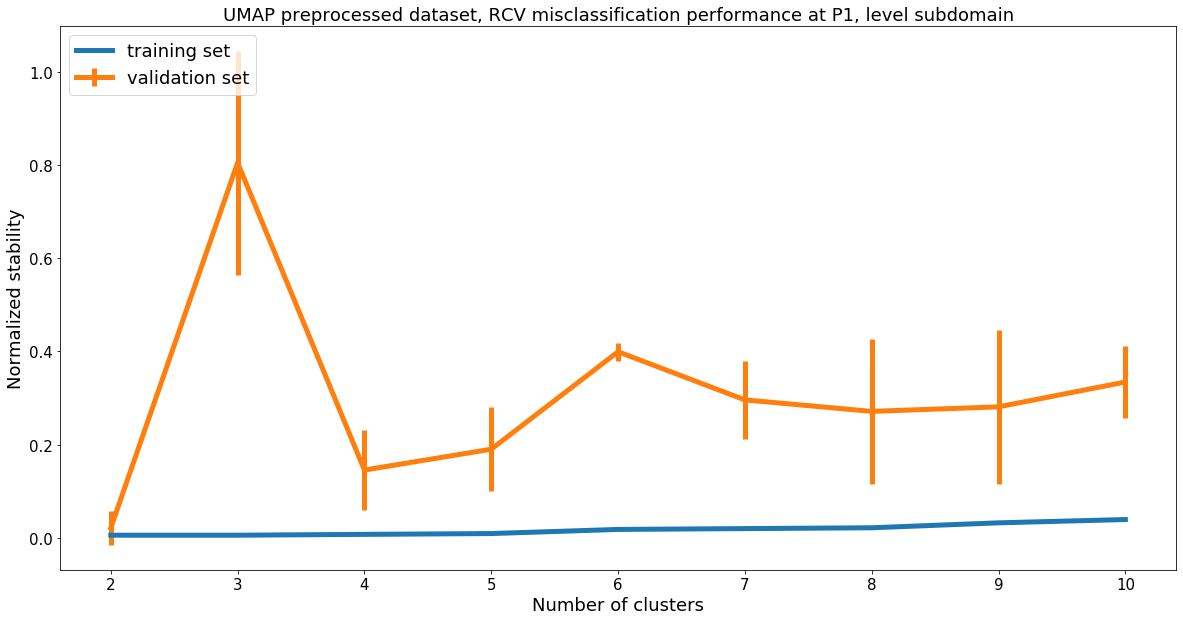

Loading BokehJS ...

Loading BokehJS ...

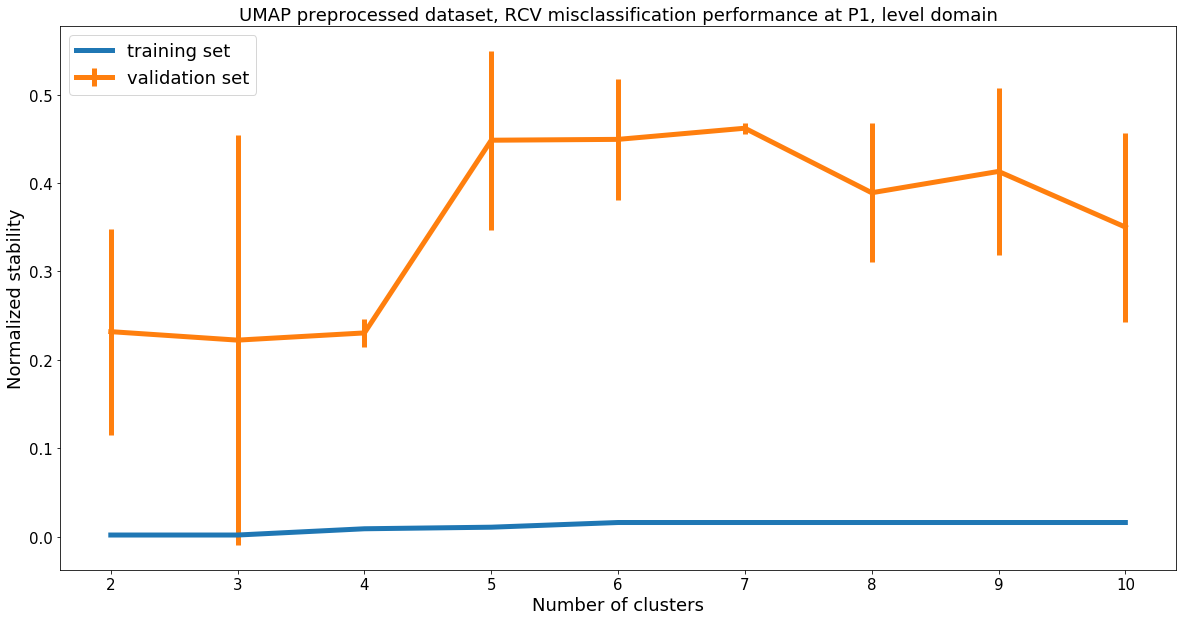

08:00:01 INFO: Best number of clusters: 3
08:00:01 INFO: Training ACC: 0.9946902654867257, Test ACC: 0.9655172413793104


Loading BokehJS ...

Loading BokehJS ...

08:00:21 INFO: Best number of clusters: 2
08:00:21 INFO: Training ACC: 1.0, Test ACC: 0.9749478079331941


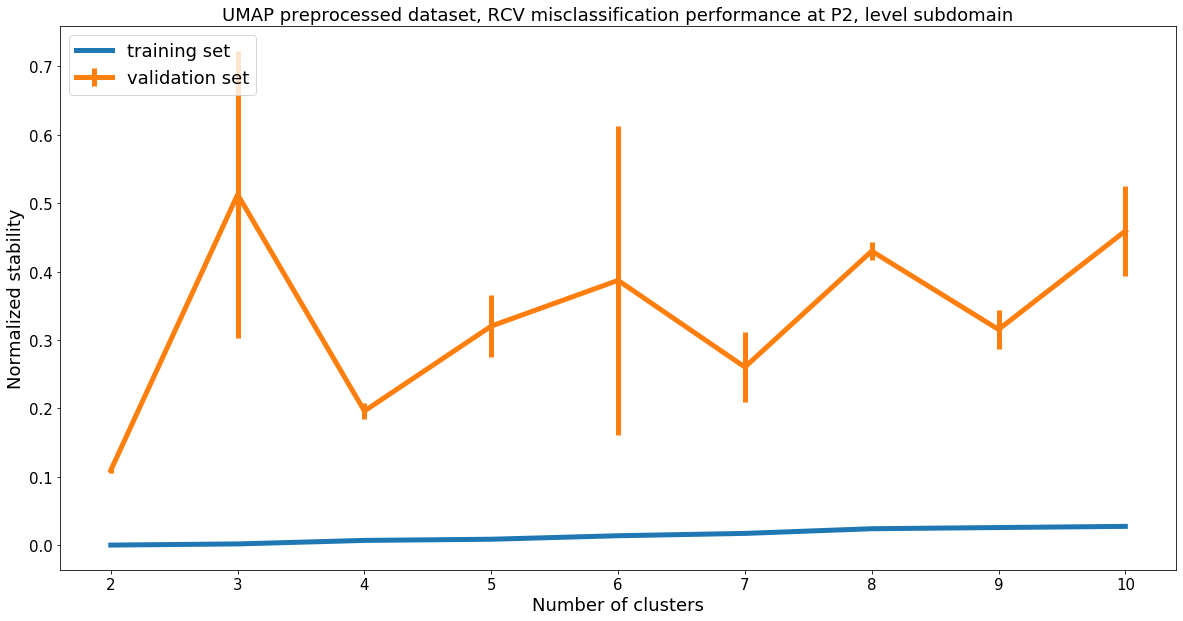

Loading BokehJS ...

Loading BokehJS ...

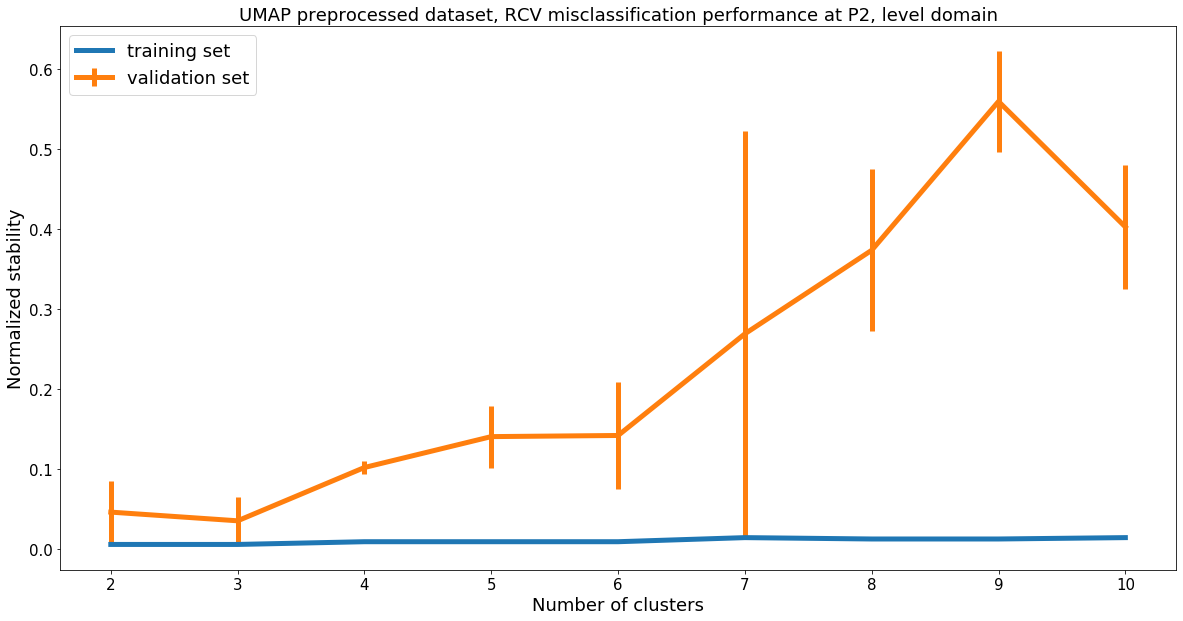

08:00:41 INFO: Best number of clusters: 3
08:00:41 INFO: Training ACC: 1.0, Test ACC: 0.8475991649269311


Loading BokehJS ...

Loading BokehJS ...

08:00:42 INFO: Saving train/test datasets with new cluster
08:00:45 INFO: Building distance matrix...


In [6]:
dict_imp = rcv_method.run_rcv(vineland, demo_info, na_perc=best_param['na_perc'], n_neigh=best_param['n_neigh'], cv_fold=best_param['cv'], cl_range=[2, 11], scatter=True, heatmap=True)

In [7]:
relab_dict_imp = relabel(dict_imp, plot_scatter=True)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...